<a href="https://colab.research.google.com/github/sunnyiisc/Three-Phase-Inverter-12VDC-to-440VAC-3ph-50Hz/blob/main/3_phase_Inverter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Modules

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

# Sinusoidal PWM Signal

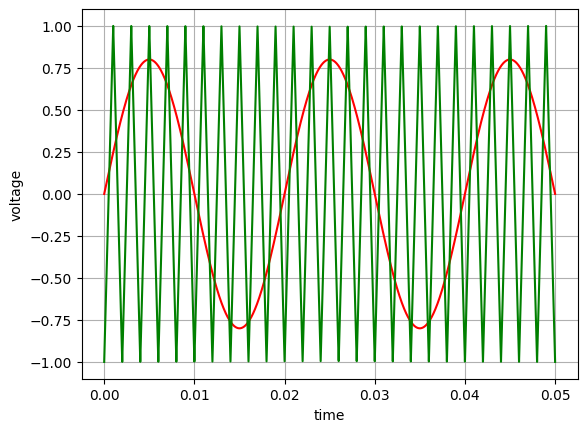

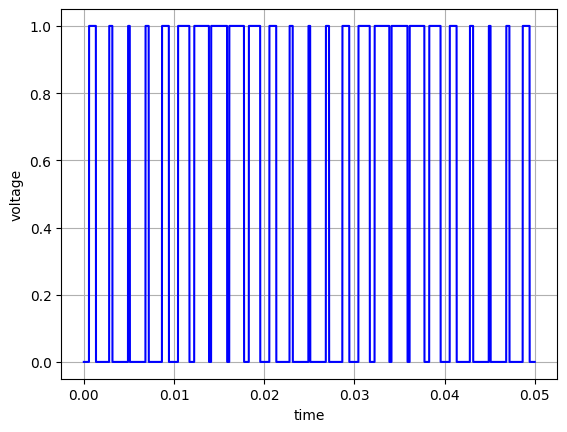

In [ ]:
# Constants
fm = 50
fc = 500
m = 0.8

tran = 50e-3

# Transient time
t = np.linspace(0, tran, num=10000)

# Modulating Signal
xm = m * np.sin(2*math.pi*fm*t)

# Carrier Signal
xc = sig.sawtooth(2*math.pi*fc*t, width=0.5)

# PWM signal
x_pwm = xm < xc

# Plotting
plt.plot(t, xm, 'r')
plt.plot(t, xc, 'g')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

plt.plot(t, x_pwm, 'b')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

# Space Vector PWM for 3Phase Inveter

In [ ]:
print('Hello 3phase Inverter')

Hello 3phase Inverter


## Modulating Signal

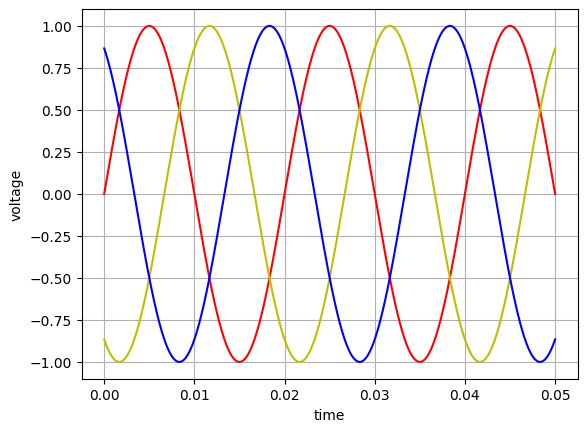

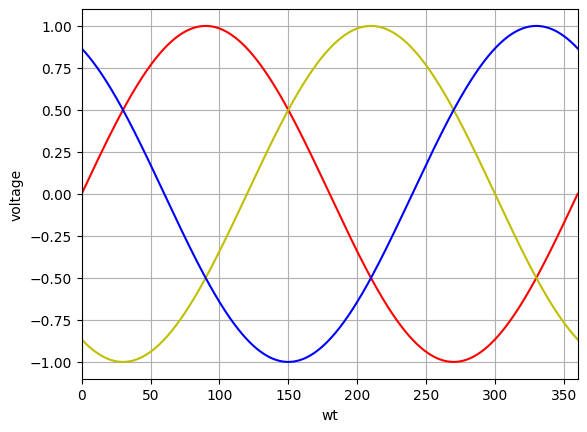

In [ ]:
# Constants
fs = 50

tran = 50e-3


# Transient time
t = np.linspace(0, tran, num=10000)
theta = 360*fs*t


# Functions
xa = np.sin(2*math.pi*fs*t)
xb = np.sin(2*math.pi*fs*t - (2*math.pi/3))
xc = np.sin(2*math.pi*fs*t - (4*math.pi/3))

x_3 = 0.2 * np.sin(2*math.pi*3*fs*t)


# Plotting
plt.plot(t, xa, 'r')
plt.plot(t, xb, 'y')
plt.plot(t, xc, 'b')
plt.xlabel('time')
plt.ylabel('voltage')
plt.grid()
plt.show()

plt.plot(theta, xa, 'r')
plt.plot(theta, xb, 'y')
plt.plot(theta, xc, 'b')
plt.xlim(0, 360)
plt.xlabel('wt')
plt.ylabel('voltage')
plt.grid()
plt.show()

# plt.plot(t, x_3, 'r')
# plt.plot(t, xa+x_3, 'b')
# plt.xlabel('time')
# plt.ylabel('voltage')
# plt.grid()
# plt.show()

## SVPWM Switching Duration

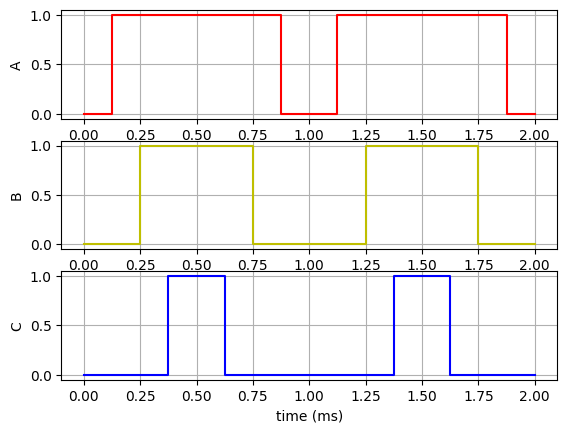

In [ ]:
def digital_sig(arry, no_rep):
    sig = np.tile(arry, no_rep)
    
    #Signal for Python Plotting
    sig_py = np.append([0], sig)

    return(sig_py)


# Signals
rep = 2
period = 1

A = digital_sig([0, 1, 1, 1, 1, 1, 1, 0], rep)
B = digital_sig([0, 0, 1, 1, 1, 1, 0, 0], rep)
C = digital_sig([0, 0, 0, 1, 1, 0, 0, 0], rep)

t = np.linspace(0, rep*period, num=len(A))

# Plotting
plt.subplot(3,1,1)
plt.step(t, A, 'r')
plt.xlabel('time (ms)')
plt.ylabel('A')
plt.grid()

plt.subplot(3,1,2)
plt.step(t, B, 'y')
plt.xlabel('time (ms)')
plt.ylabel('B')
plt.grid()

plt.subplot(3,1,3)
plt.step(t, C, 'b')
plt.xlabel('time (ms)')
plt.ylabel('C')
plt.grid()

# SVPWM Gate Switching

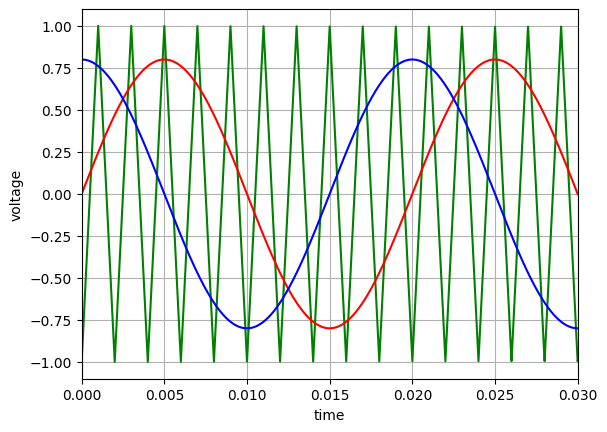

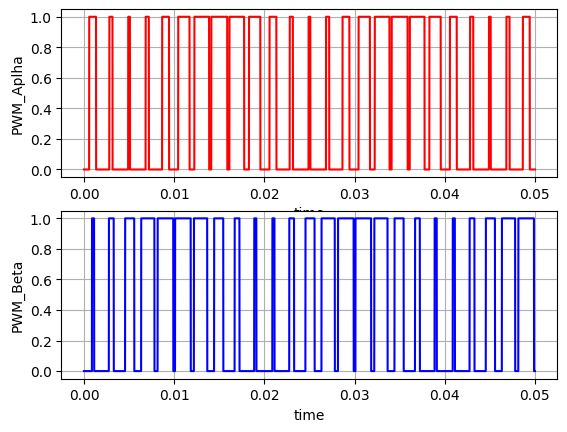

In [ ]:
# Constants
fm = 50
fc = 500
m = 0.8

tran = 50e-3

# Transient time
t = np.linspace(0, tran, num=10000)

# Modulating Signal
xalpha = m * np.sin(2*math.pi*fm*t)
xbeta = m * np.sin(2*math.pi*fm*t + math.pi/2)

# Carrier Signal
xc = sig.sawtooth(2*math.pi*fc*t, width=0.5)

# PWM signal
x_pwma = xalpha < xc
x_pwmb = xbeta < xc

# Plotting
plt.plot(t, xc, 'g')
plt.plot(t, xalpha, 'r')
plt.plot(t, xbeta, 'b')
plt.xlabel('time')
plt.ylabel('voltage')
plt.xlim(0, 30e-3)
plt.grid()
plt.show()


plt.subplot(2,1,1)
plt.plot(t, x_pwma, 'r')
plt.xlabel('time')
plt.ylabel('PWM_Aplha')
plt.grid()

plt.subplot(2,1,2)
plt.plot(t, x_pwmb, 'b')
plt.xlabel('time')
plt.ylabel('PWM_Beta')
plt.grid()
plt.show()